In [13]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from scipy.linalg import eigh


# Making and vizualising the graph

/var/folders/tt/3h_jlt8571z664b95jr80v_40000gn/T/ipykernel_37847/1333559708.py:8: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj_matrix = nx.adjacency_matrix(G).todense()


Adjacency Matrix:
[[0 1 1 1 0]
 [1 0 1 1 0]
 [1 1 0 1 0]
 [1 1 1 0 1]
 [0 0 0 1 0]]


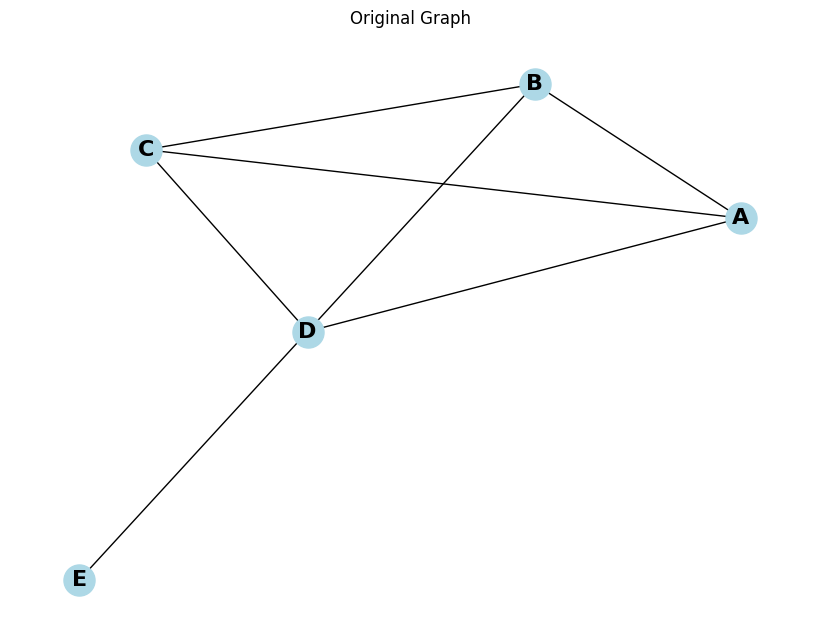

In [2]:
# Create the graph
G = nx.Graph()
G.add_edges_from([('A', 'B'), ('A', 'C'), ('A', 'D'), ('B', 'C'), ('B', 'D'), ('C', 'D'), ('D', 'E')])

m = G.number_of_edges()

# Get the adjacency matrix
adj_matrix = nx.adjacency_matrix(G).todense()
print("Adjacency Matrix:")
print(adj_matrix)

# Visualize the graph
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color='lightblue', node_size=500, font_size=16, font_weight='bold')
plt.title("Original Graph")
plt.show()

# Finding Chromatic Number and Vizualising again

Chromatic Number: 4


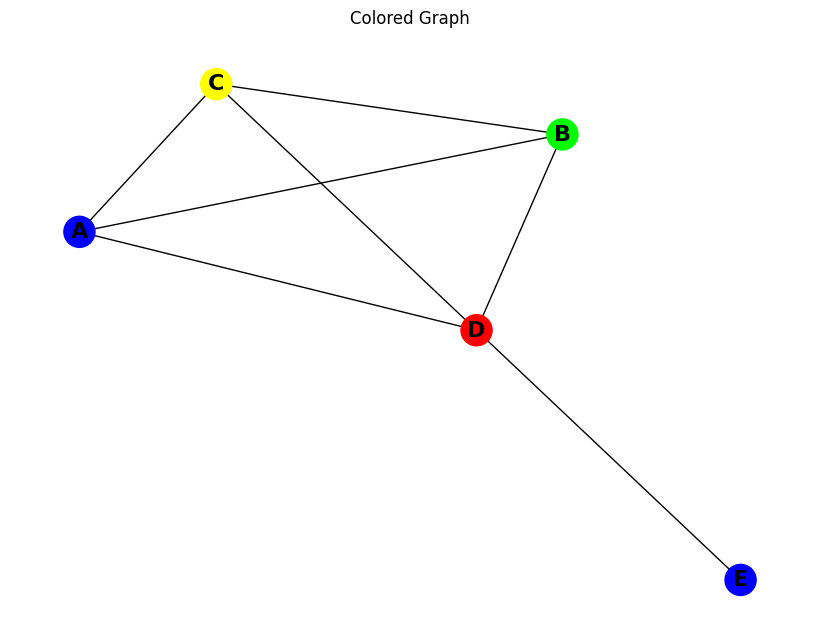

Node D: red
Node A: blue
Node B: green
Node C: yellow
Node E: blue


In [3]:




# Find the chromatic number
chromatic_number = nx.greedy_color(G, strategy='largest_first')
print(f"Chromatic Number: {max(chromatic_number.values()) + 1}")

# Color the graph
color_map = ['#ff0000', '#0000ff', '#00ff00', '#ffff00', '#ff00ff']
node_colors = [color_map[chromatic_number[node]] for node in G.nodes()]

# Visualize the colored graph
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color=node_colors, node_size=500, font_size=16, font_weight='bold')
plt.title("Colored Graph")
plt.show()

# Print the color assignments
color_names = ['red', 'blue', 'green', 'yellow', 'magenta']
for node, color_index in chromatic_number.items():
    print(f"Node {node}: {color_names[color_index]}")

# Finding laplacian

In [4]:
def calculate_laplacian(graph):
    # Get the adjacency matrix
    adj_matrix = nx.adjacency_matrix(graph).toarray()
    
    # Calculate the degree matrix
    degrees = np.sum(adj_matrix, axis=1)
    degree_matrix = np.diag(degrees)
    
    # Calculate the Laplacian matrix
    laplacian_matrix = degree_matrix - adj_matrix

    # Calculate the Laplacian matrix signless
    laplacian_matrix_signless = degree_matrix + adj_matrix
    
    return laplacian_matrix, laplacian_matrix_signless

l, g = calculate_laplacian(G)

print('laplacian:')
print('\n')
print(l)

print('laplacian signless:')
print('\n')
print(g)


laplacian:


[[ 3 -1 -1 -1  0]
 [-1  3 -1 -1  0]
 [-1 -1  3 -1  0]
 [-1 -1 -1  4 -1]
 [ 0  0  0 -1  1]]
laplacian signless:


[[3 1 1 1 0]
 [1 3 1 1 0]
 [1 1 3 1 0]
 [1 1 1 4 1]
 [0 0 0 1 1]]


/var/folders/tt/3h_jlt8571z664b95jr80v_40000gn/T/ipykernel_37847/3342450906.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj_matrix = nx.adjacency_matrix(graph).toarray()


# Finding Eigen Values and Eigenvectors of Laplacian and adjacency matrix

In [5]:
eigenvalues_l, eigenvectors_l = np.linalg.eig(l)
eigenvalues_g, eigenvectors_g = np.linalg.eig(g)
eigenvalues_adj, eigenvectors_adj = np.linalg.eig(np.array(adj_matrix))

# Checking Hoffman's bound
χ(G) ≥ 1 - μmax/abs(μmin)

Equation 3 https://arxiv.org/pdf/1812.02613

In [6]:
1 + np.max(eigenvalues_adj)/np.abs(np.min(eigenvalues_adj))

3.0382107706773347

# Checking Lima bound
χ(G) ≥ 1 - 2m/(2m - n*∂min)

Equaiton 3 https://arxiv.org/pdf/1812.02613

In [7]:
1 - (2*m)/(2*m - adj_matrix.shape[0]*np.min(eigenvalues_g))

-0.2889674877774795

# Kolotilina bound
χ(G) ≥ 1 - μmax/(μmax - ∂max + λmax) 

Equaiton 3 https://arxiv.org/pdf/1812.02613

In [8]:
1 - np.max(eigenvalues_adj)/(np.max(eigenvalues_adj) - np.max(eigenvalues_g) + np.max(np.max(eigenvalues_l)))

-0.8007014759474962

# Calculating complement graph

In [11]:
a_compl = np.array(1 - adj_matrix - np.eye(adj_matrix.shape[0]))

In [14]:


def spectral_clustering(adjacency_matrix, n_clusters):
    # Compute the normalized Laplacian
    degree = np.sum(adjacency_matrix, axis=1)
    laplacian = np.diag(degree) - adjacency_matrix
    normalized_laplacian = np.diag(1 / np.sqrt(degree)) @ laplacian @ np.diag(1 / np.sqrt(degree))

    # Compute eigenvectors
    eigenvalues, eigenvectors = eigh(normalized_laplacian, eigvals=(0, n_clusters - 1))

    # Perform K-means clustering on the eigenvectors
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    clusters = kmeans.fit_predict(eigenvectors)

    return clusters

def visualize_clusters(adjacency_matrix, clusters):
    # Create a graph from the adjacency matrix
    G = nx.from_numpy_array(adjacency_matrix)

    # Set up the plot
    plt.figure(figsize=(12, 8))
    
    # Define a color map
    color_map = plt.cm.get_cmap('viridis')
    
    # Draw the graph
    pos = nx.spring_layout(G)
    nx.draw_networkx_edges(G, pos, alpha=0.2)
    nx.draw_networkx_nodes(G, pos, node_color=[color_map(c) for c in clusters], 
                           node_size=100, cmap=color_map)
    
    plt.title("Graph Clusters Visualization")
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Example usage
# a_compl = ... # Your adjacency matrix
n_clusters = 3  # Number of clusters you want

# Perform spectral clustering
clusters = spectral_clustering(a_compl, n_clusters)

# Visualize the results
visualize_clusters(a_compl, clusters)

/var/folders/tt/3h_jlt8571z664b95jr80v_40000gn/T/ipykernel_37847/2974121294.py:5: RuntimeWarning: divide by zero encountered in divide
  normalized_laplacian = np.diag(1 / np.sqrt(degree)) @ laplacian @ np.diag(1 / np.sqrt(degree))
/var/folders/tt/3h_jlt8571z664b95jr80v_40000gn/T/ipykernel_37847/2974121294.py:5: RuntimeWarning: invalid value encountered in matmul
  normalized_laplacian = np.diag(1 / np.sqrt(degree)) @ laplacian @ np.diag(1 / np.sqrt(degree))
/var/folders/tt/3h_jlt8571z664b95jr80v_40000gn/T/ipykernel_37847/2974121294.py:8: DeprecationWarning: Keyword argument 'eigvals' is deprecated in favour of 'subset_by_index' keyword instead and will be removed in SciPy 1.12.0.
  eigenvalues, eigenvectors = eigh(normalized_laplacian, eigvals=(0, n_clusters - 1))


ValueError: array must not contain infs or NaNs